### Dataset Preparation and Image Pre-Processing


#### Data Augmentation

Rotate each image in 70 different angles from -10.5º to 10.5º


In [1]:
import cv2
import imutils
import os
import math

# change the path to the directory where the augmented data is retrieved and saved

path = "D:/Concordia/COMP473/CK+/CK+_Complete/surprise"

imgfiles = os.listdir(path)

# rotating images from -10.5º to 10.5º degree from the original position
start = -10.5
step = 0.3
myRange = []
for i in range(71):
  myRange.append(round(start+(i*step),2))
myRange.remove(0.0)

result = []
for file in imgfiles:
    img = cv2.imread(path+"/"+file)
    for a in myRange:
        imgr = imutils.rotate(img, angle=a)
        result+=[imgr]

# to ensure the augmentation is done properly
print(len(imgfiles))
print(len(result))

count = 0
for j in range(len(result)):
  if(count == len(myRange)):
    count = 0

  img = result[j]
  i = math.floor(j/(len(myRange)))
  x = imgfiles[i].split(".")
  newName = x[0] + str(myRange[count]) + '.png'
  cv2.imwrite(os.path.join(path , newName), img)
  count+=1

415
29050


#### Preparing dataset for cross-validation
3 Different Datasets for Cross-Validation:
<br>Each dataset contains different set of images in training and testing for cross-validtion purposes
<br>The ratio of the split is the same for all datasets
<br>
<br>
Data split:
<li> 80% of total data as Training set (64% of total as Training and 16% as Validation set)
<li> 20% of total data as Testing set


In [2]:
#import necessary libraries
import splitfolders
import random

In [3]:
# Split with a ratio of (.64, .16, .2) for training, validation, and test sets
# Seed is determined randomly to ensure each dataset contains different collection of images in test sets
# Destination directory name is FER_2013_Augmented, because the data augmentation will be done directly to each datasets later

# change the path names in the following line of code to split and save data
#splitfolders.ratio('Path of the Original Directory', output='Path of Destination Directory', 
#                   seed=random.seed(10), ratio=(.64, .16, .20), group_prefix=None, move=False) 

#Dataset 1
splitfolders.ratio('D:\Concordia\COMP473\CK+\CK+_Complete', output='D:\Concordia\COMP473\CK+\CKD1',
                   seed=random.seed(10), ratio=(.64, .16, .20), group_prefix=None, move=False) 

#Dataset 2
splitfolders.ratio('D:\Concordia\COMP473\CK+\CK+_Complete', output='D:\Concordia\COMP473\CK+\CKD2',
                   seed=random.seed(10), ratio=(.64, .16, .20), group_prefix=None, move=False) 

#Dataset 3
splitfolders.ratio('D:\Concordia\COMP473\CK+\CK+_Complete', output='D:\Concordia\COMP473\CK+\CKD3',
                   seed=random.seed(10), ratio=(.64, .16, .20), group_prefix=None, move=False) 

Copying files: 17732 files [25:22,  6.18 files/s]

KeyboardInterrupt: 

#### Data Augmentation

Rotate each image to angles between -80° and 80° to create 12 additional images.

In [2]:
import cv2
import imutils
import os
import math

In [6]:
# change the path to the directory where the augmented data is retrieved and saved

path = "PATH TO THE DIRECTORY OF YOUR IMAGE FILES"

imgfiles = os.listdir(path)

# rotating images from -80 to 80 degree from the original position
rot_angle = [-80, -65, -50, -35, -20, -5, 5, 20, 35, 50, 65, 80]
result = []
for file in imgfiles:
    img = cv2.imread(path+"\\"+file)
    for a in rot_angle:
        imgr = imutils.rotate(img, angle=a)
        result+=[imgr]

# to ensure the augmentation is done properly
print(len(imgfiles))
print(len(result))

for j in range(len(result)):
    img = result[j]
    i = math.floor(j/12)
    x = imgfiles[i].split(".")
    k = (j-(i*12))
    if k == 0:
        newName = x[0] + 'n0'+'.png'
    elif k == 1:
        newName = x[0] + 'n1'+'.png'
    elif k == 2:
        newName = x[0] + 'n2'+'.png'
    elif k == 3:
        newName = x[0] + 'n3'+'.png'
    elif k == 4:
        newName = x[0] + 'n4'+'.png'
    elif k == 5:
        newName = x[0] + 'n5'+'.png'
    elif k == 6:
        newName = x[0] + 'n6'+'.png'
    elif k == 7:
        newName = x[0] + 'n7'+'.png'
    elif k == 8:
        newName = x[0] + 'n8'+'.png'
    elif k == 9:
        newName = x[0] + 'n9'+'.png'
    elif k == 10:
        newName = x[0] + 'n10'+'.png'
    elif k == 11:
        newName = x[0] + 'n11'+'.png'
    cv2.imwrite(os.path.join(path , newName), img)

1799
21588


#### Pre-Processing: Image Cropping

Details about image cropping...

In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

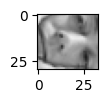

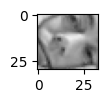

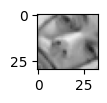

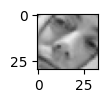

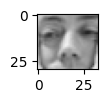

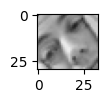

In [31]:
image = cv2.imread('D:/Concordia/COMP473/files/FER_2013_DataSet/FER_2013_Agumented3/train/angry/PrivateTest_2328297n0.png')
imgc = image[8:38, 5:38]
plt.subplot(1, 7, 1)
plt.imshow(imgc.astype('uint8'))
plt.show()


image = cv2.imread('D:/Concordia/COMP473/files/FER_2013_DataSet/FER_2013_Agumented3/train/angry/PrivateTest_2328297n1.png')
imgc = image[8:38, 5:38]
plt.subplot(1, 7, 1)
plt.imshow(imgc.astype('uint8'))
plt.show()

image = cv2.imread('D:/Concordia/COMP473/files/FER_2013_DataSet/FER_2013_Agumented3/train/angry/PrivateTest_2328297n2.png')
imgc = image[8:38, 5:38]
plt.subplot(1, 7, 1)
plt.imshow(imgc.astype('uint8'))
plt.show()

image = cv2.imread('D:/Concordia/COMP473/files/FER_2013_DataSet/FER_2013_Agumented3/train/angry/PrivateTest_2328297n3.png')
imgc = image[8:38, 5:38]
plt.subplot(1, 7, 1)
plt.imshow(imgc.astype('uint8'))
plt.show()

image = cv2.imread('D:/Concordia/COMP473/files/FER_2013_DataSet/FER_2013_Agumented3/train/angry/PrivateTest_2328297n6.png')
imgc = image[8:38, 5:38]
plt.subplot(1, 7, 1)
plt.imshow(imgc.astype('uint8'))
plt.show()

image = cv2.imread('D:/Concordia/COMP473/files/FER_2013_DataSet/FER_2013_Agumented3/train/angry/PrivateTest_2328297n9.png')
imgc = image[8:38, 5:38]
plt.subplot(1, 7, 1)
plt.imshow(imgc.astype('uint8'))
plt.show()

#### Pre-Processing: intensity normalization 

Details about intensity normalization


In [2]:
import cv2
import numpy as np
import os

In [4]:
# data_dir = 'Enter the path to your original directory here'
# new_data_dir = 'Enter the path to your destination directory here'

data_dir = 'D:\Concordia\COMP473\\files\FER_2013_DataSet\Test3'
new_data_dir = 'D:\Concordia\COMP473\\files\FER_2013_DataSet\Test_IN3'

for image_class in os.listdir(data_dir):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            
            image_name = image
            image_path = os.path.join(data_dir, image_class, image_name)

            #load image as grayscale
            img = cv2.imread(image_path, 0)
            
            # Calculate mean and STD
            mean, STD  = cv2.meanStdDev(img)

            # Clip frame to lower and upper Standard Deviation
            offset = 0.3
            clipped = np.clip(img, mean - offset*STD, mean + offset*STD).astype('uint8')

            # Normalize to range
            result = cv2.normalize(clipped, clipped, 0, 255, norm_type=cv2.NORM_MINMAX)

            #check if there is a directory for the emotion category, if not create one
            if not os.path.isdir(os.path.join(new_data_dir, image_class)):
                    os.mkdir(os.path.join(new_data_dir, image_class))
                
            cv2.imwrite(os.path.join(new_data_dir, image_class , image_name), result)
